# **AP157 Module C Lab Assignment**

## Module C1: Networks

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.

_Credits_: The sample social network used is taken from https://nauczanki.wordpress.com/2014/11/10/social-network-analysis-basics-in-300-words-dalmooc-assignment-week-3/, which in turn is taken from an unspecified MOOC assignment.

### Student Information

_Full Name (Last Name, First Name)_: Remo, Paul Kenneth H. \
_Student No._: 202001185\
_Section_: TX1

### Submission Information

_Date and Time Submitted (most recent upload)_: 05/23/2024 ; 7:10PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: PAUL KENNETH H. REMO**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/30
* Part 4 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For all parts of this assignment,  refer to the diagram of the sample social network in the Google Drive "Datasets" Folder (https://drive.google.com/file/d/1DkAK44GfocX0bmlSfK5Q6cbYXAUkixyj/view?usp=drive_link)

#### PART 1 - Network generation and characteristics *(30 points)*

1. Using the Python package networkx, define a network that represents the social network of friends in the diagram. *(15 points)*  

2. Calculate the ff. network characteristics: *(15 points; 5 points each)*
- Diameter
- Density
- Average Degree

3. Create the degree distribution plot and briefly discuss what it tells us about this social network. *(10 points)*

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

C:\Users\PKHR\AppData\Local\Temp\ipykernel_23472\63033260.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


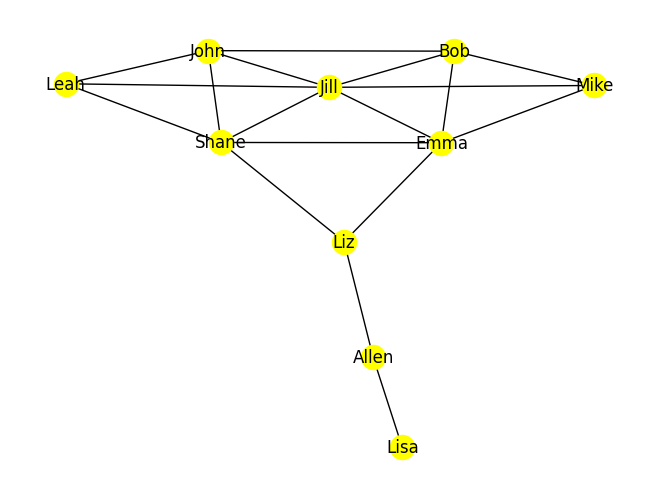

In [4]:
#Initialize the graph
G = nx.Graph()
#Name the different nodes corresponding to each person
nodes = ['Lisa',  
     'Allen', 
     'Liz',
     'Emma', 
     'Jill', 
     'Shane',
     'Leah',
     'John',
     'Bob',
     'Mike']
nameshrt = ['Ls','Al','Lz','Em','Ji','Sh','Le','Jo','Bo','Mi']
#Add the nodes to the network
G.add_nodes_from(nodes)
#Create edges to make the given network
edges = [('Lisa','Allen'),
         ('Allen','Liz'),
         ('Liz','Emma'),
         ('Liz','Shane'),
         ('Shane','Emma'),
         ('Shane','Jill'),
         ('Shane','Leah'),
         ('Shane','John'),
         ('Leah','John'),
         ('Shane','Jill'),
         ('Jill','Bob'),
         ('Jill','Emma'),
         ('Jill','Mike'),
         ('Jill','John'),
         ('Jill','Leah'),
         ('Bob','Emma'),
         ('Bob','John'),
         ('Bob','Mike'),
         ('Mike','Emma'),
         ('Mike','Emma'),]
#Add the edges
G.add_edges_from(edges)
#Make the network
nx.draw(G, with_labels = True, node_color = 'yellow')

This is the reconstructed network from the image

In [39]:
#Get the necessary information, diameter, density, and average degree
diameter = nx.diameter(G)
density = nx.density(G)
#Processing of the degree function since it returns a dictionary type variable
deglist = dict(G.degree())
degval = np.array(list(deglist.values()))
degkey = list(deglist.keys())
degree = np.mean(degval)
frequency = np.zeros(6)
print('The Diameter is', diameter)
print('The Density is', density)
print('The Average degree is', degree)

for i in range(len(degval)):
    for j in range(len(degval)):
        if j+1 == degval[i]:
            frequency[j] += 1

The Diameter is 4
The Density is 0.4
The Average degree is 3.6


- The longest path is from Lisa to either Leah, John, Bob, or Mike. All of which takes 4 steps to reach, hence the diameter is 4
- The amount of edges is 40% of all possible edge combinations for a network of 10 nodes, hence the densiy is 0.4
- The average degree is 3.6, which is the mean value of the amount of edges connected to each node

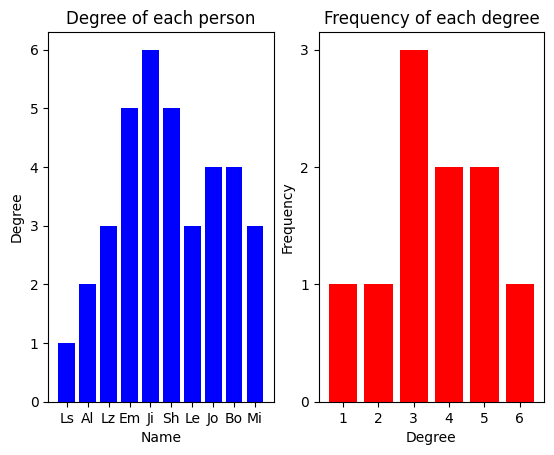

In [40]:
#Setting a y-axis for the frequency plot
yaxis = np.linspace(1, 6, 6)

#Create plots for both names vs frequency, and degree vs frequency
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.bar(nameshrt, degval, color = 'blue')
ax1.set_title('Degree of each person')
ax1.set_xlabel('Name')
ax1.set_ylabel('Degree')

ax2.bar(yaxis, frequency,  color = 'red')
ax2.set_title('Frequency of each degree')
ax2.set_xlabel('Degree')
ax2.set_ylabel('Frequency')
ax2.set_yticks(np.arange(0,4, step = 1))
ax2.set_xticks(np.arange(1,7, step = 1))
plt.show()

We can see here that the amount of connections that each person has corresponds to a certain degree of centrality. Plotted above are both the amount of edges each node is connected to, and a plot of the frequency value of each degree value

#### PART 2 - Centrality Measures *(30 points)*

Generate a table of centrality measures per node. Columns are:
- Name
- Degree Centrality
- Betweenness Centrality
- Closeness Centrality

Briefly discuss who are the most "central" people in the social network and why.

In [41]:
#Initialize names and get the values of centralities
names = nodes
degraw = nx.degree_centrality(G)
betraw = nx.betweenness_centrality(G)
cloraw = nx.closeness_centrality(G)
#Get the values from the dictionaries that the above commands have given
degcen = np.array(degraw.values())
betcen = np.array(betraw.values())
clocen = np.array(cloraw.values())
#Insert them into a dataframe
df = pd.DataFrame()
df.insert(0, 'Names', names)
df.insert(1, 'Degree Centrality', degcen)
df.insert(2, 'Betweenness Centrality', betcen)
df.insert(3, 'Closeness Centrality', clocen)
df

,Names,Degree Centrality,Betweenness Centrality,Closeness Centrality
0,Lisa,0.111111,0.0,0.310345
1,Allen,0.222222,0.222222,0.428571
2,Liz,0.333333,0.388889,0.6
3,Emma,0.555556,0.231481,0.642857
4,Jill,0.666667,0.101852,0.6
5,Shane,0.555556,0.231481,0.642857
6,Leah,0.333333,0.0,0.5
7,John,0.444444,0.023148,0.529412
8,Bob,0.444444,0.023148,0.529412
9,Mike,0.333333,0.0,0.5


**Degree Centrality**

Degree centrality counts how many edges are connected to a given node. Using this criterion, Jill has the highest degree centrality because they have 6 edges with the people around them. Hence, Jill is the most central in terms of degree centrality.

**Betweenness Centrality**

Betweenness Centrality takes a chosen node A, and then takes nodes B and C, and draws the shortest path from B to C, all the pairs of nodes B and C whose shortest path passes through A will add to its betwenness centrality. Using this criterion, Liz has the highest betweenness centrality because they are the only connection towards Allen and Lisa, hence all other nodes will have to go through Liz, making them the most central in terms of betweenness.

**Closeness Centrality**

Closeness Centrality takes the average distance it takes from a chosen node A to any other node B. Using this criterion, both Liz and Jill have the highest closeness centrality, this is because of the aforementioned descriptions of Liz being closest to Allen and Lisa, and Jill being the person with the highest degree centrality.

#### PART 3 - Identify communities *(40 points)*

1. Identify communities in the social network using *(30 points)*:
- Louvain community detection algorithm
- Any other community detection algorithm of your choice

2. Calculate the modularity of the partitions from the two community detection algorithms. *(10 points)*

Briefly describe the algorithm you used and compare the results from the two algorithms.

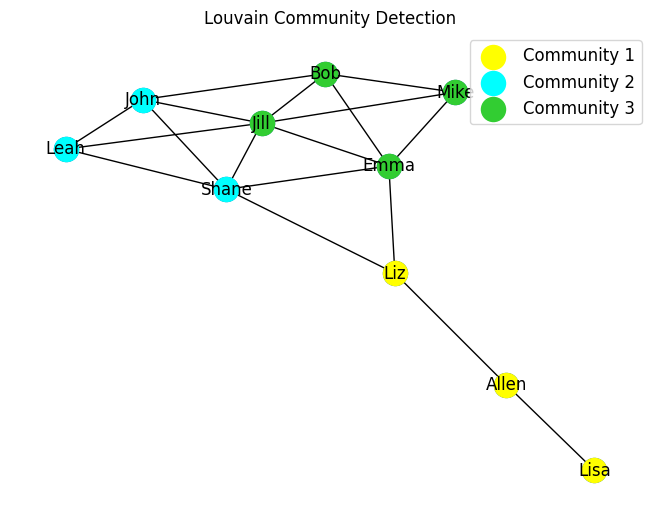

In [10]:
#Define the lists of different variables
Ca, Cb, Cc = nx.community.louvain_communities(G)
Ca = list(Ca)
Cb = list(Cb)
Cc = list(Cc)
#Recreate the original network of nodes and make the graph
nodes1 = Ca + Cb + Cc
Gc1 = nx.Graph()
for i in nodes1:
    Gc1.add_node(i)
for from_loc, to_loc in edges:
    Gc1.add_edge(from_loc, to_loc)
pos = nx.spring_layout(Gc1)
#Draw the graph and differentiate the colors of the nodes
nx.draw(Gc1, pos, with_labels = True)
nx.draw_networkx_nodes(Gc1, pos, nodelist=Ca, node_color='yellow', label = 'Community 1')
nx.draw_networkx_nodes(Gc1, pos, nodelist=Cb, node_color='cyan', label = 'Community 2')
nx.draw_networkx_nodes(Gc1, pos, nodelist=Cc, node_color='limegreen', label = 'Community 3')
plt.title('Louvain Community Detection')
plt.legend(fontsize = '12')
plt.show()

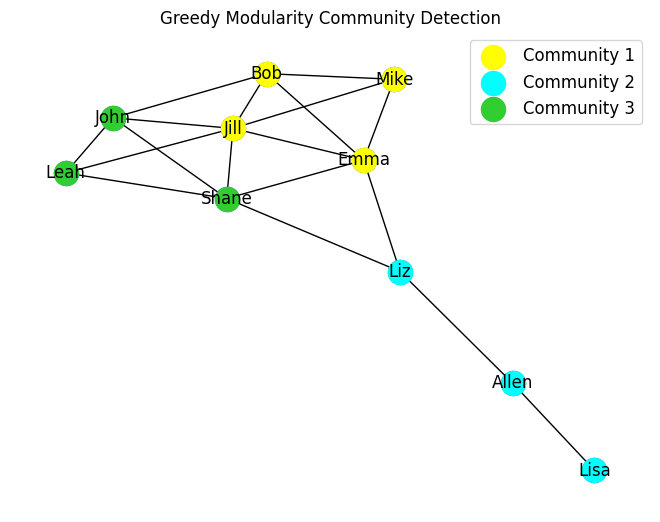

In [11]:
#Define the lists of different variables
Ca1, Cb1, Cc1 = nx.community.greedy_modularity_communities(G)
Ca1 = list(Ca1)
Cb1 = list(Cb1)
Cc1 = list(Cc1)
#Recreate the original network of nodes and make the graph
nodes2 = Ca1 + Cb1 + Cc1
Gc2 = nx.Graph()
for i in nodes2:
    Gc2.add_node(i)
for from_loc, to_loc in edges:
    Gc2.add_edge(from_loc, to_loc)
pos1 = nx.spring_layout(Gc2)
#Draw the graph and differentiate the colors of the nodes
nx.draw(Gc2, pos1, with_labels = True)
nx.draw_networkx_nodes(Gc2, pos1, nodelist=Ca1, node_color='yellow', label = 'Community 1')
nx.draw_networkx_nodes(Gc2, pos1, nodelist=Cb1, node_color='cyan', label = 'Community 2')
nx.draw_networkx_nodes(Gc2, pos1, nodelist=Cc1, node_color='limegreen', label = 'Community 3')
plt.title('Greedy Modularity Community Detection')
plt.legend(fontsize = '12')
plt.show()

Both the Louvain modularity community detection method and Greedy modularity community detection method had arrived at the same three main communities

**Louvain Modularity**

The Louvain modularity community detection method starts with the entire network as a single community. Then it selects one node and checks if the modularity increases if it is placed into a separate community, if yes, then it retains this and it chooses a neighbor to add to its community. This will repeat until the modularity reaches a maximum and adding a select node to a different community no longer increases modularity.

**Greedy modularity**

The Greedy modularity community detection method is not too different from the Louvain modularity. But the main difference is that the greedy modularity starts with each node in its own community, with N amounts of communities. Then a selected node will then try to see if there will be an increase in modularity once it adds a neighboring node to its community. This will also repeat until adding a node to a community will no longer increase modularity